<a href="https://colab.research.google.com/github/peterlhn/Google-Colab/blob/master/Matrix_Practices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
# Method - Find Revenue Sharing affecting Supply Chain Profit
def best_revenue_share(f):
    mean = 20000
    sd = 4000
    f = f

    pub_p = 9.5
    pub_v = 1
    retailer_p = 24
    retailer_c = pub_p
    retailer_s = 3

    # ------ Cost of Understocking / Overstocking ------- #
    cu = (1-f)*retailer_p - retailer_c
    co = retailer_c - retailer_s
    # Critical Fractile = Cu/(Cu+Co)
    cf = cu/(cu+co)
    # Optimal Order Quantity (Q*) 
    Q = norm.ppf(cf, loc=mean, scale=sd)

    print(f"Cost of Understocking (Cu) is {round(cu,1)}")
    print(f"Cost of Overstocking (Co) is {round(co,1)}")

    print(f"Optimal Order Quantity is {round(Q,0)}, given Critical Fractile is {round(cf,10)}")


    # -------  Number of Under / Overstocking -------- # 
    num_diff = sd *  norm(loc = 0 , scale = 1).pdf((Q-mean)/sd)

    # Understocking # 
    e_under = 1 - norm(loc = mean , scale = sd).cdf(Q)
    num_under_ind = (mean - Q)*e_under 
    num_under_sum = num_diff + num_under_ind
    print(f'Understock is {round(num_under_ind,0)} + {round(num_diff,0)} = {round(num_under_sum,0)}, given the standard index is {round(e_under,2)}')
    
    # Overstocking # 
    e_over = norm(loc = mean , scale = sd).cdf(Q)
    num_over_ind =  (Q-mean)*e_over
    num_over_sum = num_diff + num_over_ind

    print(f'Overstock is {round(num_over_ind,0)} + {round(num_diff,0)} = {round(num_over_sum,0)}, given the standard index is {round(e_over,2)}')

    # Actual Sales #
    act_sale = Q - num_over_sum
    print(f'Actual Sales at P is {round(act_sale,0)}')

    # ------- Retailer Profit ---------- #
    # (1-f)*price * Actual Sales #
    sales_retailer = round((1-f)*retailer_p * act_sale,0)

    # Overstock # X Salvage value
    overstock_sales_retailer = round(num_over_sum * retailer_s,0)

    # Optimal Order Quantity * Cost
    cost_retailer = round(retailer_c * Q,0)

    # Profit = Sum of 3 above 
    profit_retailer = sales_retailer + overstock_sales_retailer - cost_retailer

    print(f'{sales_retailer}, {overstock_sales_retailer}, {cost_retailer}')
    print(f'Retailers profit is {profit_retailer}')

    # ------ Publisher Profit -------- #
    # price * Q
    sales_publisher = round(pub_p * Q,0)

    # Revenue Share = f * p * act_sale
    share_revenue_publisher = round(f * retailer_p * act_sale,0)

    # Optimal Order Quantity * Cost
    cost_publisher = round(pub_v * Q,0)

    # Profit = Sum of 3 above 
    profit_publisher = sales_publisher + share_revenue_publisher - cost_publisher

    print(f'{sales_publisher}, {share_revenue_publisher}, {cost_publisher}')
    print(f'Retailers profit is {profit_publisher}')

    supply_chain_profit = profit_publisher + profit_retailer
    print(f'Supply Chain Profit is {supply_chain_profit}')

    return profit_retailer, profit_publisher, supply_chain_profit


In [95]:
r,p,s = best_revenue_share(0.1)
print(f'{r}, {p}, {s}')

Cost of Understocking (Cu) is 12.1
Cost of Overstocking (Co) is 6.5
Optimal Order Quantity is 21547.0, given Critical Fractile is 0.6505376344
Understock is -541.0 + 1481.0 = 940.0, given the standard index is 0.35
Overstock is 1006.0 + 1481.0 = 2487.0, given the standard index is 0.65
Actual Sales at P is 19060.0
411693.0, 7462.0, 204697.0
Retailers profit is 214458.0
204697.0, 45744.0, 21547.0
Retailers profit is 228894.0
Supply Chain Profit is 443352.0
214458.0, 228894.0, 443352.0


###**Single Calculation**

In [63]:
import numpy as np

**Model Inputs**

In [64]:
mean = 20000
sd = 4000

# Publisher
pub_p = 9.5
pub_v = 1

# Retailer
f = 0.1      # # Revenue Sharing %
retailer_p = 24
retailer_c = pub_p
retailer_s = 3

**Critical Numbers**

In [65]:
# Cost of Understocking, Cu = (1-f)*p - c
cu = (1-f)*retailer_p - retailer_c
# Cost of Overstocking, Co = c - s
co = retailer_c - retailer_s

# Critical Fractile = Cu/(Cu+Co)
# Chance of successfuly meet the demand 
cf = cu/(cu+co)

# Optimal Order Quantity (Q*) 
# NORM.INV in Excel -> loc = mean, scale = sd
Q = norm.ppf(cf, loc=mean, scale=sd)


print(f"Cost of Understocking (Cu) is {round(cu,1)}")
print(f"Cost of Overstocking (Co) is {round(co,1)}")

print(f"Optimal Order Quantity is {round(Q,0)}, given Critical Fractile is {round(cf,10)}")

Cost of Understocking (Cu) is 12.1
Cost of Overstocking (Co) is 6.5
Optimal Order Quantity is 21547.0, given Critical Fractile is 0.6505376344


**Expected Number of Over & Understock**

In [66]:
# Probability that the demand will be under / over Optimal Order Quantity
# cdf = cumulative distribution function.
num_diff = sd *  norm(loc = 0 , scale = 1).pdf((Q-mean)/sd)

# NORM.DIST(20000, 4000, 21547,1) = 0.65 =CF
# pdf = Probability density function.
# num_under = (mean-sd)*(1-NORM.DIST(Q*,mean,sd,1))
e_under = 1 - norm(loc = mean , scale = sd).cdf(Q)
num_under_ind = (mean - Q)*e_under 
num_under_sum = num_diff + num_under_ind
print(f'Understock is {round(num_under_ind,0)} + {round(num_diff,0)} = {round(num_under_sum,0)}, given the standard index is {round(e_under,2)}')


# num_under = (mean-sd)*(1-NORM.DIST(Q*,mean,sd,1))
e_over = norm(loc = mean , scale = sd).cdf(Q)
num_over_ind =  (Q-mean)*e_over
num_over_sum = num_diff + num_over_ind

print(f'Overstock is {round(num_over_ind,0)} + {round(num_diff,0)} = {round(num_over_sum,0)}, given the standard index is {round(e_over,2)}')

# Actual Sales = Q* - Overstock
act_sale = Q - num_over_sum
print(f'Actual Sales at P is {round(act_sale,0)}')

Understock is -541.0 + 1481.0 = 940.0, given the standard index is 0.35
Overstock is 1006.0 + 1481.0 = 2487.0, given the standard index is 0.65
Actual Sales at P is 19060.0


**Revenue, Cost, and Profit**

**Retailer**

In [78]:
# (1-f)*price * Actual Sales #
sales_retailer = round((1-f)*retailer_p * act_sale,0)

# Overstock # X Salvage value
overstock_sales_retailer = round(num_over_sum * retailer_s,0)

# Optimal Order Quantity * Cost
cost_retailer = round(retailer_c * Q,0)

# Profit = Sum of 3 above 
profit_retailer = sales_retailer + overstock_sales_retailer - cost_retailer

print(f'{sales_retailer}, {overstock_sales_retailer}, {cost_retailer}')
print(f'Retailers profit is {profit_retailer}')

411693.0, 7462.0, 204697.0
Retailers profit is 214458.0


**Manufacturer**

In [82]:
# price * Q
sales_publisher = round(pub_p * Q,0)

# Revenue Share = f * p * act_sale
share_revenue_publisher = round(f * retailer_p * act_sale,0)

# Optimal Order Quantity * Cost
cost_publisher = round(pub_v * Q,0)

# Profit = Sum of 3 above 
profit_publisher = sales_publisher + share_revenue_publisher - cost_publisher

print(f'{sales_publisher}, {share_revenue_publisher}, {cost_publisher}')
print(f'Retailers profit is {profit_publisher}')

204697.0, 45744.0, 21547.0
Retailers profit is 228894.0


###**Reference**

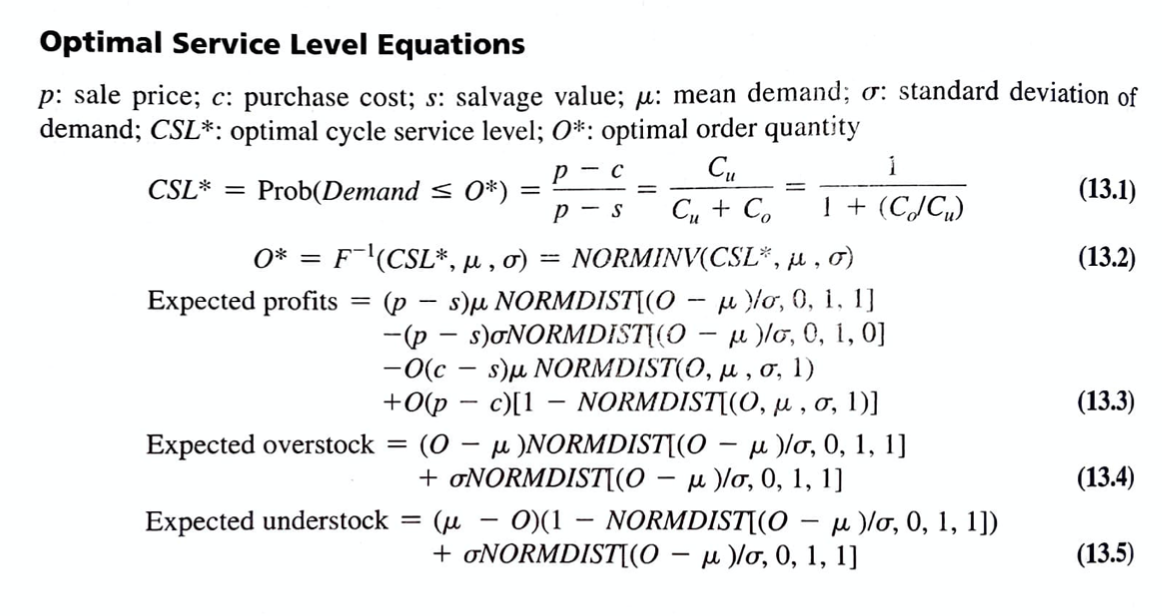

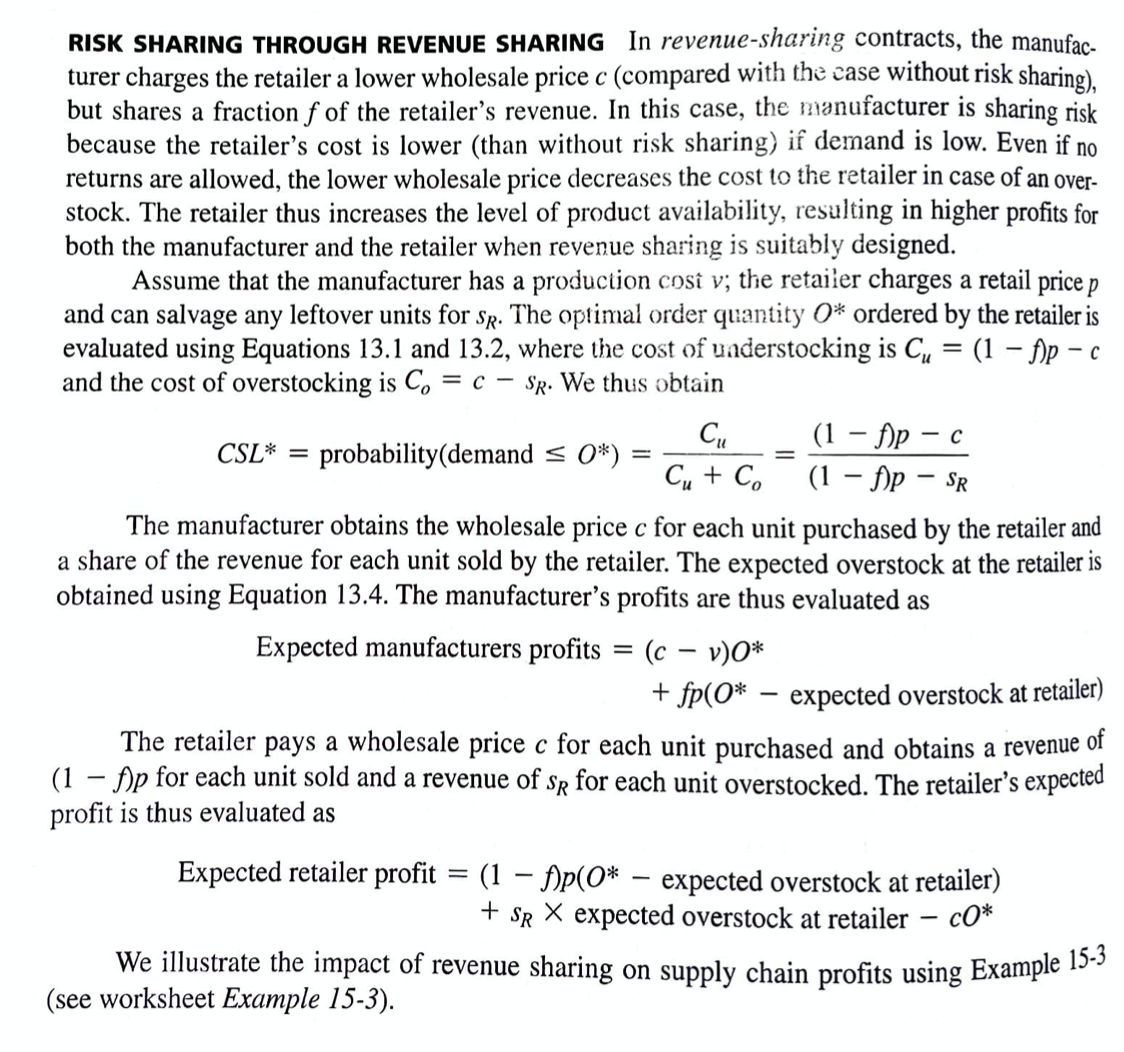